In [25]:
import numpy as np
import datetime

In [45]:
i = 0
average_B = 0
magnetic_data = open("STA_L1_MAG_SC_19652.txt", "r")
lines = magnetic_data.readlines()
mag_data = [[] for y in range(7)]
for line in lines:
    (date, time, BX, BY, BZ, B) = line.split()
    time = date + ' ' + time
    average_B += float(B)
    if i % 8 == 7:
        mag_data[0].append(datetime.datetime.strptime(time, "%d-%m-%Y %H:%M:%S.%f"))
        mag_data[1].append(average_B / 8)
        average_B = 0
    i += 1

In [46]:
proton_data = open("STA_L2_PLA_1DMAX_1MIN_19652.txt", "r")
lines = proton_data.readlines()
old_Np = '0'
old_Tp = '0'
old_v = '0'
for line in lines:
    (date, time, Np, v, Tp) = line.split()
    if Np != '-1.00000E+31':
        for i in range(60):
            mag_data[2].append(float(Np))
        old_Np = Np
    else:
        for i in range(60):
            mag_data[2].append(float(old_Np))
    if Tp != '-1.00000E+31':
        for i in range(60):
            mag_data[3].append(float(Tp))
        old_Tp = Tp
    else:
        for i in range(60):
            mag_data[3].append(float(old_Tp))
    if v != '-1.00000E+31':
        for i in range(60):
            mag_data[6].append(float(v))
        old_v = v
    else:
        for i in range(60):
            mag_data[6].append(float(old_v))

In [57]:
n = len(mag_data[1])
ns = np.ceil(np.sqrt(n)).astype(int)
for i in range(n):
    Beta = ((4.16 * 0.00001 * mag_data[3][i]) + 5.34) * mag_data[2][i] / (mag_data[1][i] * mag_data[1][i])
    VA = 20 * mag_data[1][i] / (mag_data[2][i] ** 0.5)
    mag_data[4].append(Beta)
    mag_data[5].append(VA)

In [48]:
mag_data[2] = mag_data[2][:n]
mag_data[3] = mag_data[3][:n]
mag_data[4] = mag_data[4][:n]
mag_data[5] = mag_data[5][:n]
mag_data[6] = mag_data[6][:n]

In [24]:
data = open("STA_L2_PLA_1DMAX_1MIN_19652.txt", "r")
lines = data.readlines()
mag_data = [[] for y in range(7)]
old_NP = '0'
old_T = '0'
old_V = '0'
for line in lines:
    (date, time, B, NP, T, V, BETA) = line.split()
    time = date + ' ' + time
    mag_data[0].append(datetime.strptime(time, "%d-%m-%Y %H:%M:%S.%f"))
    if NP != '-1.00000E+30':
        mag_data[2].append(float(NP))
        old_NP = NP
    else:
        mag_data[2].append(float(old_NP))
    if B != '-1.00000E+30':
        mag_data[1].append(float(B))
        old_B = B
    else:
        mag_data[1].append(float(old_B))
    if T != '-1.00000E+30':
        mag_data[3].append(float(T))
        old_T = T
    else:
        mag_data[3].append(float(old_T))
    if V != '-1.00000E+30':
        mag_data[6].append(float(V))
        old_V = V
    else:
        mag_data[6].append(float(old_V))
    if BETA != '-1.00000E+30':
        mag_data[4].append(float(BETA))
        old_BETA = BETA
    else:
        mag_data[4].append(float(old_BETA))

ValueError: not enough values to unpack (expected 7, got 5)

In [24]:
print(len(mag_data[0]), len(mag_data[2]), len(mag_data[3]))

20024 20024 20024


In [61]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,15)

In [56]:
n = len(mag_data[0])
ns = np.ceil(np.sqrt(n)).astype(int)
for i in range(n):
    VA = 20 * mag_data[1][i] / (mag_data[2][i] ** 0.5)
    mag_data[5].append(VA)

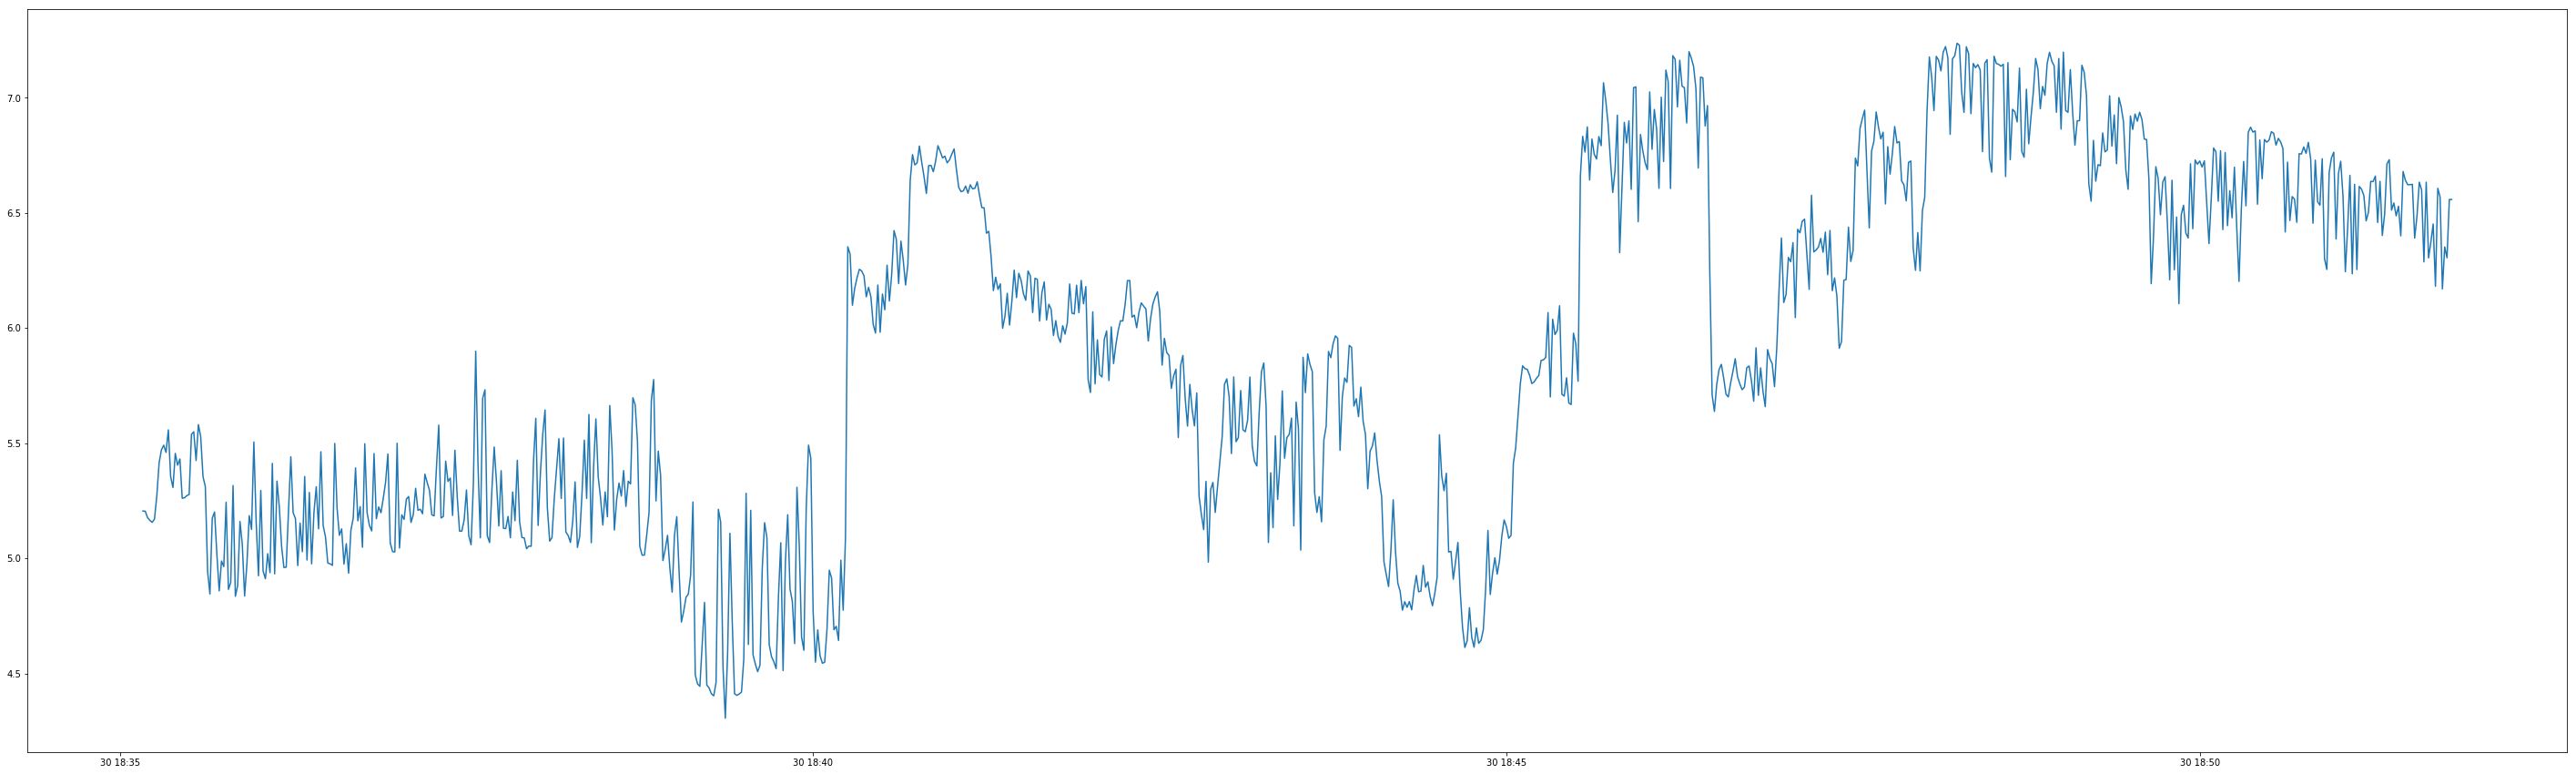

In [69]:
plt.plot(mag_data[0][5000:6000], mag_data[1][5000:6000])
plt.show()

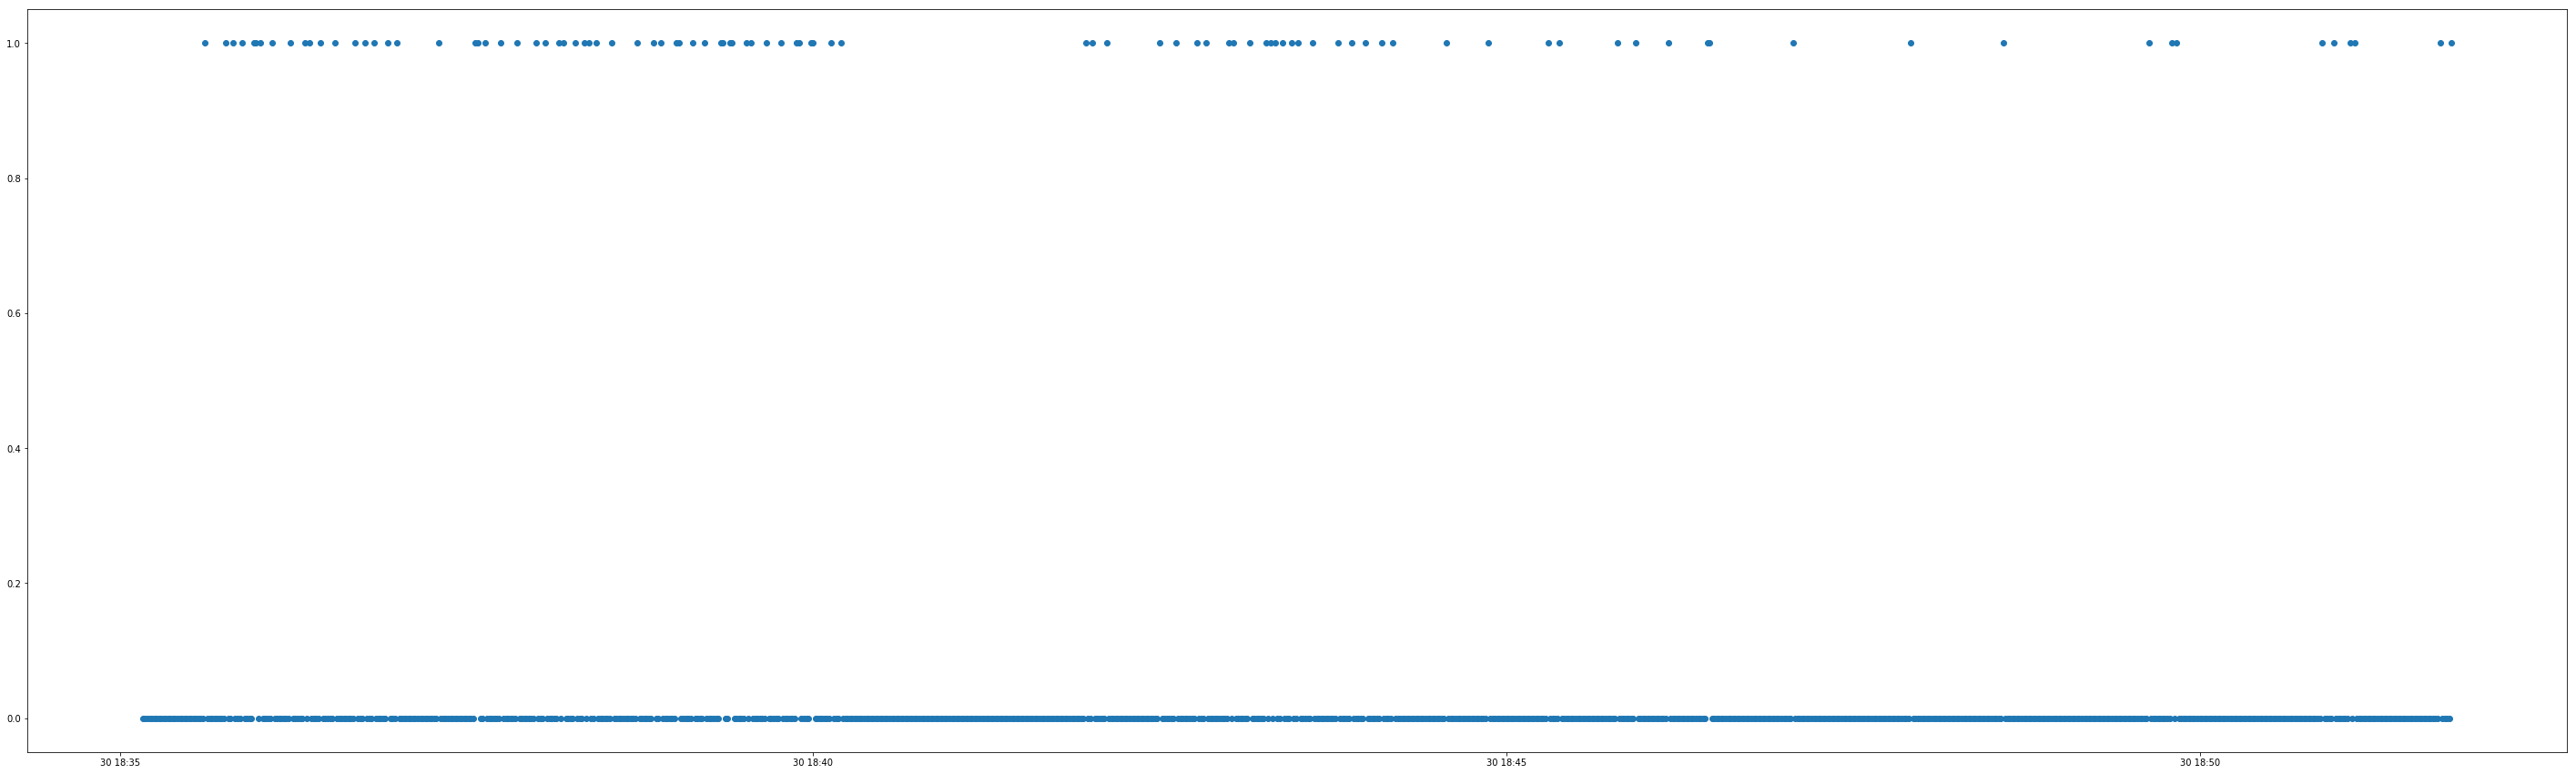

In [68]:
plt.plot(mag_data[0][5000:6000], mag_data[7][5000:6000], "o")
plt.show()

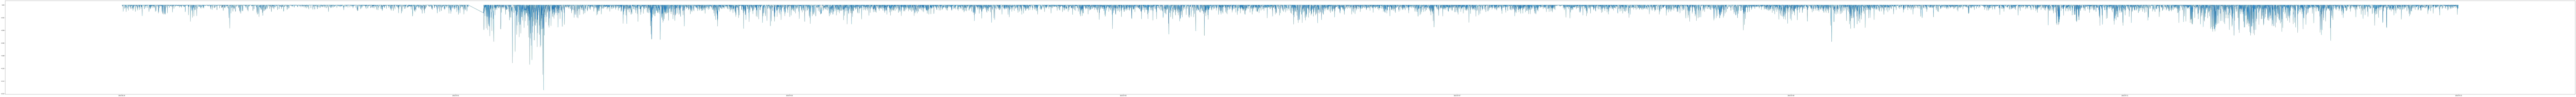

In [14]:
plt.plot(mag_data[0][:n-1], derivatives[5])
plt.show()

In [0]:
for i in range(5000):
  print(mag_data[0][i], mag_data[6][i])

In [49]:
derivatives = []
derivatives.append(np.diff(mag_data[1]))
derivatives.append(np.diff(mag_data[4]))
derivatives.append(np.diff(np.array(mag_data[5])/np.array(mag_data[6])))
derivatives.append(np.minimum(derivatives[0], 0))
derivatives.append(np.maximum(derivatives[1], 0))
derivatives.append(np.minimum(derivatives[2], 0))

[5.020134999999999,
 5.030525,
 4.921805,
 5.021593750000001,
 5.05473,
 5.007031249999999,
 5.26011375,
 5.04933125,
 5.01985625,
 5.0272325,
 5.0642425,
 5.12873375,
 5.1737,
 5.10865,
 5.0388174999999995,
 5.021165,
 5.00476125,
 5.02635375,
 5.02520125,
 5.033925000000001,
 5.04128625,
 5.0286625,
 4.91130625,
 5.015767500000001,
 5.12078,
 5.14224125,
 5.11424875,
 5.1679825,
 5.11392,
 5.1600025,
 5.166611250000001,
 5.078011249999999,
 5.11885625,
 5.18812625,
 5.151858749999999,
 5.20564,
 5.27063375,
 5.2537312499999995,
 5.214385,
 5.1995175,
 5.152735000000001,
 5.14028125,
 5.14002,
 5.124865000000001,
 5.1228887499999995,
 5.22989875,
 5.2567275,
 5.30147,
 5.3200425,
 5.282685000000001,
 5.31354875,
 5.32949375,
 5.27449,
 5.2403474999999995,
 5.27768875,
 5.2911575,
 5.32487875,
 5.288872499999999,
 5.30403,
 5.30011,
 5.29635375,
 5.3480025,
 5.3002225,
 5.28864,
 5.29832375,
 5.2685949999999995,
 5.311531250000001,
 5.33493375,
 5.23769,
 5.289155,
 5.28760625,
 5.2844

In [7]:
import scipy
from scipy import stats
print(scipy.stats.pearsonr(derivatives[3], derivatives[4]))
print(scipy.stats.pearsonr(derivatives[4], derivatives[5]))
print(scipy.stats.pearsonr(derivatives[0], derivatives[1]))
print(scipy.stats.pearsonr(derivatives[1], derivatives[2]))

(-0.37769572654476125, 0.0)
(-0.28493516650456796, 0.0)
(-0.3724599152612847, 0.0)
(-0.3503733438090097, 0.0)


In [0]:
max_correlation = 0
x = 0
for j in np.arange(0, 0.1, 0.001):
  correct = 0
  wrong = 0
  change = 0
  for i in range(n - 1):
    if mag_data[4][i] >= 3:
      change += 1
    if derivatives[2][i] <= -j or derivatives[2][i] >= j:
      change += 1
    if change == 1:
      wrong += 1
    if change == 2:
      correct += 1
    change = 0
  print(j, correct/(correct + wrong))
  if correct/(correct+wrong) > max_correlation:
    max_correlation = correct/(correct + wrong)
    x = j


In [23]:
max_correlation = 0
max_wrong = 0
x = 0
y = 0
z = 0
for k in np.arange(0.14, 2, 10):
  for j in np.arange(0.22, 5, 50):
    for l in np.arange(0.003, 0.02, 2):
      correct = 0
      wrong = 0
      change = 0
      for i in range(n - 1):
        if derivatives[0][i] <= -k:
          change += 1
        if derivatives[1][i] >= j:
          change += 1
        if derivatives[2][i] <= -l:
          change += 1
        if change > 0 and change < 3:
          wrong += 1
        if change == 3:
          correct += 1
        change = 0
      if correct/wrong > max_wrong:
        max_wrong = (correct/wrong)
        max_correlation = correct/(correct + wrong)
        x = -k
        y = j
        z = -l
print(correct, max_correlation)

892 0.13859540087010566


In [58]:
mag_data.append([])
for i in range(n - 1):
    if derivatives[0][i] <= -0.15 and derivatives[1][i] >= 0.3 and derivatives[2][i] <= -0.003:
      mag_data[7].append(1)
      print(i)
    else:
      mag_data[7].append(0)

1564
2287
2288
3212
3504
3550
3581
3591
3594
3595
4649
4674
4682
4684
4686
4690
4749
4752
4758
4767
4771
4789
4800
4832
4834
4836
4872
4874
4875
4885
4910
4925
4932
4936
4939
4941
4945
4953
4956
4958
4977
5027
5036
5039
5043
5048
5049
5051
5056
5064
5070
5072
5077
5083
5092
5096
5100
5106
5110
5128
5144
5145
5148
5155
5162
5170
5174
5180
5182
5187
5191
5193
5196
5203
5214
5221
5224
5231
5232
5238
5243
5250
5251
5254
5255
5261
5263
5270
5276
5283
5284
5289
5290
5298
5302
5408
5411
5417
5440
5447
5456
5460
5470
5472
5479
5486
5488
5490
5493
5497
5500
5506
5517
5523
5529
5536
5541
5564
5582
5608
5613
5638
5646
5660
5677
5678
5714
5765
5805
5868
5878
5880
5943
5948
5955
5957
5994
5999
6001
6006
6011
6020
6030
6032
6037
6043
6047
6048
6052
6066
6071
6077
6081
6085
6098
6102
6105
6109
6116
6126
6130
6138
6143
6145
6156
6158
6160
6166
6173
6179
6181
6184
6190
6192
6196
6215
6225
6246
6251
6262
6265
6268
6272
6275
6284
6313
6336
6348
6350
6353
6357
6366
6369
6374
6380
6386
6388
6390
6392
6396


In [53]:
#count = 0
f = open("outputSTEREO_A_1s.txt","w+")
f.write("Date\tTime\tB_der\tbeta_der\tVA/V_der\t|B|\tNP\tT\tbeta\tVA\tV\n")
for i in range(n - 1):
    #if i % 60 == 0:
        #if count != 0:
            #f.write(str(count))
            #f.write("\n")
        #count = 0
    if mag_data[7][i] == 1:
        #if count == 0:
          f.write(datetime.datetime.strftime(mag_data[0][i] - datetime.timedelta(microseconds=mag_data[0][i].microsecond), "%d-%m-%Y %H:%M:%S.%f"))
          #f.write(datetime.datetime.strftime(mag_data[0][i], "%d-%m-%Y %H:%M:%S.%f"))
          f.write("\t")
          f.write(str(derivatives[0][i]))
          f.write("\t")
          f.write(str(derivatives[1][i]))
          f.write("\t")
          f.write(str(derivatives[2][i]))
          f.write("\t")
          f.write(str(mag_data[1][i]))
          f.write("\t")
          f.write(str(mag_data[2][i]))
          f.write("\t")
          f.write(str(mag_data[3][i]))
          f.write("\t")
          f.write(str(mag_data[4][i]))
          f.write("\t")
          f.write(str(mag_data[5][i]))
          f.write("\t")
          f.write(str(mag_data[6][i]))
          #f.write("\t")
          f.write("\n")
          #count += 1
        #else:
          #count += 1
f.close()

In [56]:
f = open("outputSTEREO_A_1s.txt","w+")
f.write("Date\tTime\tB_der\tbeta_der\tVA/V_der\t|B|\tNP\tT\tbeta\tVA\tV\n")
for i in range(n - 1):
    if mag_data[7][i] == 1:
      f.write(datetime.datetime.strftime(mag_data[0][i] - datetime.timedelta(microseconds=mag_data[0][i].microsecond), "%d-%m-%Y %H:%M:%S.%f"))
      f.write("\t")
      f.write(str(derivatives[0][i]))
      f.write("\t")
      f.write(str(derivatives[1][i]))
      f.write("\t")
      f.write(str(derivatives[2][i]))
      f.write("\t")
      f.write(str(mag_data[1][i]))
      f.write("\t")
      f.write(str(mag_data[2][i]))
      f.write("\t")
      f.write(str(mag_data[3][i]))
      f.write("\t")
      f.write(str(mag_data[4][i]))
      f.write("\t")
      f.write(str(mag_data[5][i]))
      f.write("\t")
      f.write(str(mag_data[6][i]))
      f.write("\n")
f.close()

In [18]:
count = 0
for i in range(n - 1):
    if mag_data[7][i] == 1:
        count += 1
print(count)

787
